# Import of packagers

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [305]:
#importation des donnees
data = pd.read_csv("all_data.csv")
data.head()

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,header,video_ids,videos
0,0,1330025067400553,لكل من يسأل عن حمية اللوكارب LowCarb Diet 🥑🫒🍓🍖...,لكل من يسأل عن حمية اللوكارب LowCarb Diet 🥑🫒🍓🍖...,NaN,NaN,2021-08-31 10:51:53,1630403513,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t39.3...,...,47,[{'name': 'Diabète Maroc - régime Low Carb - ا...,1191348251268236,NaN,3.007771e+15,['3007770982772985'],False,Ayman Iguerhzifen‏Diabète Maroc - régime Low C...,NaN,NaN
1,1,1669619220107801,لا للحرمان مرضى السكري,لا للحرمان مرضى السكري,NaN,NaN,2022-12-29 16:26:35,1672327595,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t15.5...,...,1,"[{'name': 'Zanouba Diabete', 'link': '/zanouba...",1191348251268236,NaN,NaN,[],False,تمت مشاركة ‏منشور‏ بواسطة ‏‎Zanouba Diabete‎‏.,NaN,NaN
2,2,1669102223492834,السلام عليكم الله يخليكم بغيت نعرف واش كاين شي...,السلام عليكم الله يخليكم بغيت نعرف واش كاين شي...,NaN,NaN,2022-12-29 00:09:56,1672268996,NaN,https://scontent.frba5-1.fna.fbcdn.net/m1/v/t6...,...,2,[{'name': 'Diabète Maroc - régime Low Carb - ا...,1191348251268236,NaN,NaN,[],False,بالتحدي حققي احلامك‏Diabète Maroc - régime Low...,NaN,NaN
3,3,1668398646896525,سلام أعضاء المجموعة عندي سؤال عفاكم بنتي ولات ...,سلام أعضاء المجموعة عندي سؤال عفاكم بنتي ولات ...,NaN,NaN,2022-12-28 01:45:29,1672188329,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t1.30...,...,7,NaN,1191348251268236,NaN,NaN,[],False,NaN,NaN,NaN
4,4,1665682760501447,السلام عليكم بغيت نسول النساء الحوامل واش كتست...,السلام عليكم بغيت نسول النساء الحوامل واش كتست...,NaN,NaN,2022-12-24 14:43:18,1671889398,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t1.30...,...,5,NaN,1191348251268236,NaN,NaN,[],False,NaN,NaN,NaN


In [306]:
#Checking the culmns name
data.columns

Index(['Unnamed: 0', 'post_id', 'text', 'post_text', 'shared_text',
       'original_text', 'time', 'timestamp', 'image', 'image_lowquality',
       'images', 'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'header', 'video_ids', 'videos'],
      dtype='object')

# Data Cleaning

<AxesSubplot:>

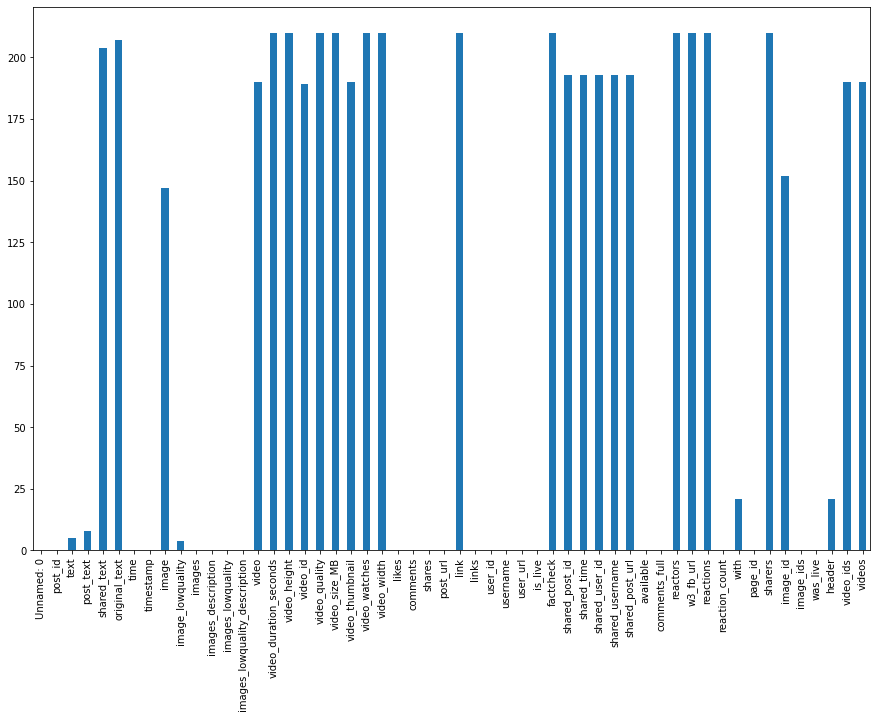

In [307]:
#Checking the columns values
data.isna().sum().plot(kind='bar',figsize=(15,10))

In [308]:
#la Suppression des colonnes qui ne sont pas nécessaire
data = data.drop(['image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id',
             'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width','post_url', 'link', 'links', 'username','user_url', 'is_live', 'factcheck', 'shared_time',
             'shared_username', 'shared_post_url', 'available','shared_text', 'w3_fb_url','with', 'page_id', 'timestamp','image_id', 'image_ids', 
             'was_live','header', 'video_ids', 'videos'], axis=1)

In [309]:
#les colonnes restant
data.columns

Index(['Unnamed: 0', 'post_id', 'text', 'post_text', 'original_text', 'time',
       'likes', 'comments', 'shares', 'user_id', 'shared_post_id',
       'shared_user_id', 'comments_full', 'reactors', 'reactions',
       'reaction_count', 'sharers'],
      dtype='object')

# Data visualisation

In [310]:
# convertit la colonne "time" du DataFrame "data" en objets DateTime
data['time'] = pd.to_datetime(data['time'])

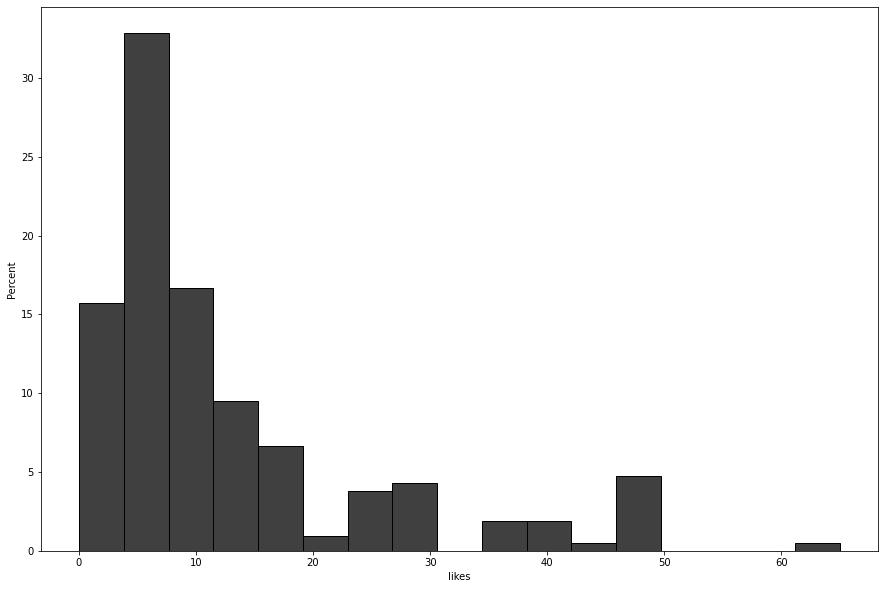

In [311]:
#la visualisation de nbr des likes 
fig = plt.figure(figsize=(15,10))
sns.histplot(data=data['likes'], stat='percent', color='black')
plt.savefig("likes.png", dpi=150)

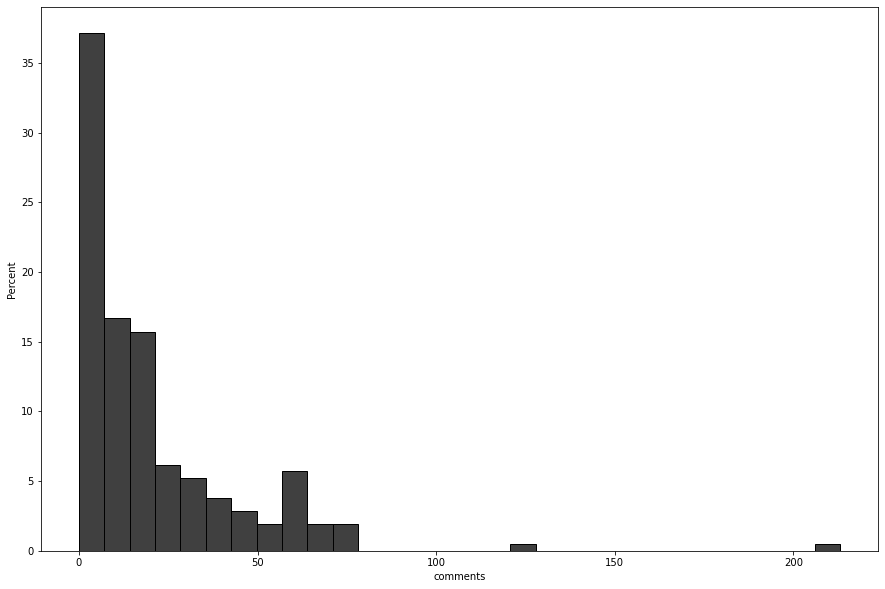

In [312]:
#la visualisation de nbr des comments
fig = plt.figure(figsize=(15,10))
sns.histplot(data=data['comments'], stat='percent', color='black')
plt.savefig("Comments.png", dpi=150)

Engagement for Each Publication

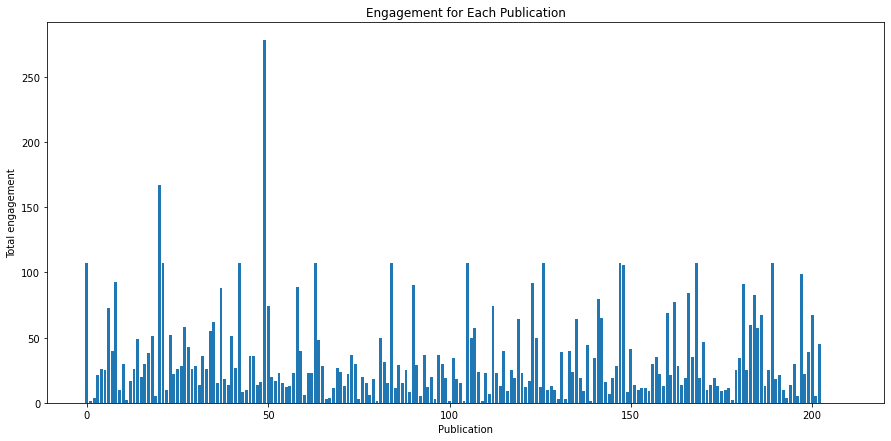

In [313]:
# Créer un DataFrame avec les colonnes d'intérêt
engagement = data[['likes', 'comments', 'shares']]

# Calculer le total d'engagement pour chaque publication
engagement_total = engagement.sum(axis=1)

# Créer une nouvelle figure avec une taille personnalisée
fig = plt.figure(figsize=(15, 7))

# Créer un graphique en barres
plt.bar(data.index, engagement_total)

# Ajouter un titre et des labels d'axe
plt.title('Engagement for Each Publication')
plt.xlabel('Publication')
plt.ylabel('Total engagement')

plt.show()

Evolution of Likes, Comments, Shares and Posts Over Time

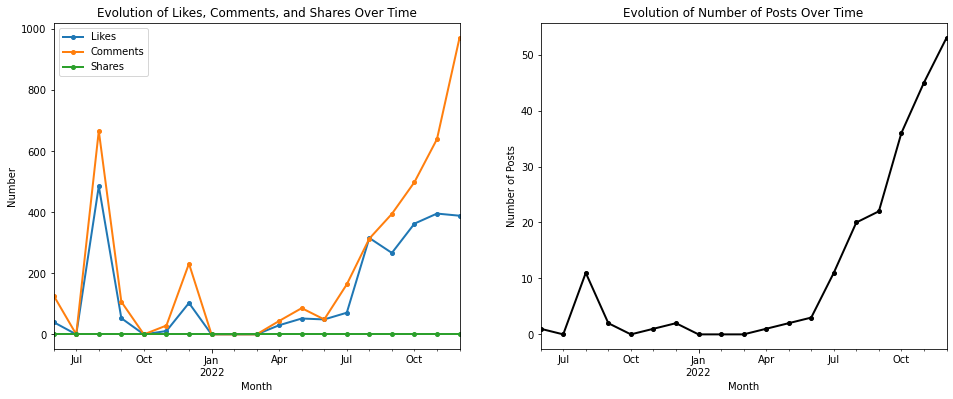

In [314]:
# Regrouper les données par mois et calculer la somme des likes, des commentaires et des partages
grouped_interaction = data.groupby(pd.Grouper(key='time', freq='M'))[['likes', 'comments', 'shares']].sum()

# Regrouper les données par mois et compter le nombre de posts
grouped_posts = data.groupby(pd.Grouper(key='time', freq='M'))['post_id'].count()

# Créer la figure et les axes pour les deux graphiques
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# Graphique de gauche
grouped_interaction.plot(ax=axs[0], kind='line', marker='o', markersize=4, linewidth=2)

# Ajouter un titre et des légendes aux axes
axs[0].set_title('Evolution of Likes, Comments, and Shares Over Time')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number')
axs[0].legend(['Likes', 'Comments', 'Shares'])

# Graphique de droite
grouped_posts.plot(ax=axs[1], kind='line', marker='o', markersize=4, linewidth=2, color='black')

# Ajouter un titre et des légendes aux axes
axs[1].set_title("Evolution of Number of Posts Over Time")
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Posts')

# Afficher les graphiques
plt.show()

Relationship between Number of Likes and Comments

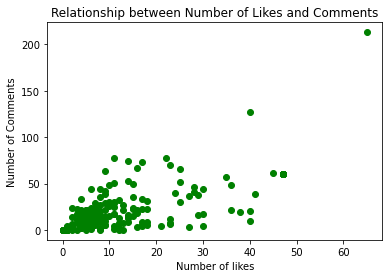

In [315]:
# Extraire les colonnes "likes" et "comments"
likes = data['likes']
comments = data['comments']

# Créer un diagramme de dispersion
plt.scatter(likes, comments, c='g')

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Number of likes')
plt.ylabel('Number of Comments')
plt.title('Relationship between Number of Likes and Comments')
plt.show()

Percentages of Likes and Comments

In [316]:
# Calculer les totaux de likes et commentaires
total_likes = data['likes'].sum()
total_comments = data['comments'].sum()

somme_tot = total_likes + total_comments
# Calculer les pourcentages de likes et commentaires
percent_likes = total_likes / somme_tot * 100
percent_comments = total_comments / somme_tot * 100

In [317]:
percent_likes, percent_comments

(37.77873687239246, 62.22126312760754)

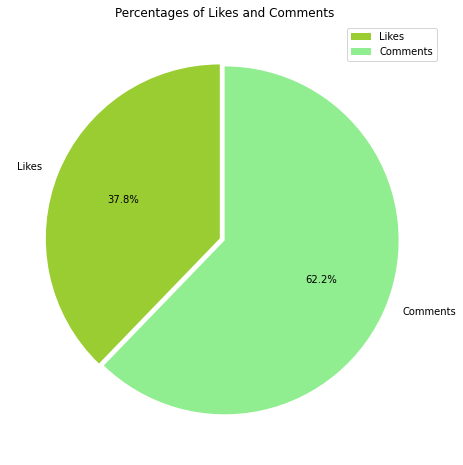

In [318]:
fig = plt.figure(figsize=(8, 8))

# Créer un graphique en secteurs
labels = ['Likes', 'Comments']
sizes = [percent_likes, percent_comments]

#colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
colors = ['yellowgreen', 'lightgreen']

explod_list = [0.03, 0]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explod_list, startangle=90)

# Ajouter un titre
plt.title('Percentages of Likes and Comments')

# Afficher le graphique
plt.legend(loc='upper right')
plt.show()

# Vizualization of Interaction Graph

In [319]:
#importation de data reactors
my_df = pd.read_csv("reactors.csv")
my_df.head()

,post_id,user_id,reactors,reaction_count,reactions
0,1330025067400553,100006203372529,"[{'name': 'Mina Mina', 'link': 'https://facebo...",47,"{'أعجبني': 43, 'أحببته': 4}"
1,1668398646896525,610161740001467,"[{'name': 'سمية الزعيم', 'link': 'https://face...",8,"{'أعجبني': 6, 'أدعمه': 1, 'أحزنني': 1}"
2,1669744363428620,688182239711911,"[{'name': 'سمية الزعيم', 'link': 'https://face...",8,"{'أعجبني': 6, 'أحببته': 2}"
3,1669102223492834,100024964941069,"[{'name': 'Titrit Nsos', 'link': 'https://face...",5,{'أعجبني': 5}
4,1666856713717385,100000705231535,"[{'name': 'أم أسامة', 'link': 'https://faceboo...",4,"{'أعجبني': 3, 'أحببته': 1}"


Using reactors column we can extract the id of the reactor by extract_id function which we will create in the following cell:

In [320]:
def extract_id(char):
    id_reactor=''
    id_reactor_=0
    m=len(char)
#     Extract the user (reactor) id from the link if it is available
    for i in range(m) :
         if i<=m-4:
            if char[i]=='?' and char[i+1]=='i' and char[i+2]=='d'and char[i+3]=='=':
                k=i+4
                while char[k]!='&':
                    id_reactor+=char[k]
                    k+=1
                return int(id_reactor);
#    If the id reactor not available we'll create the user id by the code ASII standing on the name of the user 
    for i in range(len(char)):
         if i<=m-4:     
                if char[i:i+4]=='.com':
                    k=i+5
                    while char[k]!='?':
                        id_reactor_+=ord(char[k])
                        k+=1
                    return id_reactor_;

In [321]:
#Count the sum of reactions in our dataframe
k=0
for i in range(len(my_df)):
    if not pd.isna(my_df['reactors'][i]) : 
        k+=len(eval(my_df['reactors'][i]))       
print(k)

2577


In [322]:
#As we saw before we have 2577 lines of reactions, so we'll create a 
#datafrrame with two columns and 2577 rows
reactors_id = []
user_post = []

for i in range(len(my_df)):
    if not pd.isna(my_df['reactors'][i]) :
        for a in range(len(eval(my_df['reactors'][i]))):
             if not pd.isna(my_df['reactors'][i]) : 
                reactors_id.append(extract_id(eval(my_df['reactors'][i])[a]['link']))
                user_post.append(my_df['user_id'][i])

print(len(reactors_id),'********',len(user_post))

2577 ******** 2577


In [323]:
#Create a dataframe
G_reactions = pd.DataFrame(data = {'reactors_id':reactors_id,'user_post':user_post})

In [324]:
import networkx as nx

In [325]:
#Now we are moving to create our graph of users who posted with people who reacted to those posts
# Create G_reactions network from edgelist
G_reactions = nx.from_pandas_edgelist(
    G_reactions,
    source = 'reactors_id',
    target = 'user_post',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reactions network:', len(G_reactions.nodes()))

# Print the number of edges
print('Edges in reactions network:', len(G_reactions.edges()))

Nodes in reactions network: 593
Edges in reactions network: 1551


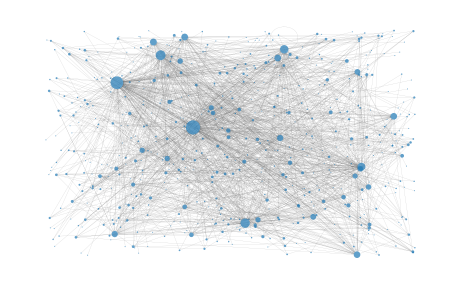

In [326]:
#Ploting the graph
plt.figure(figsize=(8, 5))
pos = nx.random_layout(G_reactions)

# Create size list
sizes = [x[1] for x in G_reactions.degree()]

# Draw the network
nx.draw_networkx(G_reactions, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 0.5, linewidths = 0, edge_color ='.4')

# Turn axis off and show
plt.axis('off'); plt.show()

# Data Analysis

# <h2>Structure Analysis</h2>

# <h3>Centrality</h3>

# <h4> 1) Degry of the centrality</h4>

In [327]:
# Generate in-degree centrality for replies
reactor_centrality = nx.in_degree_centrality(G_reactions)

In [328]:
# Store centralities in DataFrame
reply = pd.DataFrame(list(reactor_centrality.items()), columns = ['user_id','degree_centrality'])
print(reply.sort_values('degree_centrality', ascending = False).head(10))

             user_id  degree_centrality
142  100002028835739           0.342905
83   100003001016830           0.275338
231  100082864043624           0.143581
115  100008703273829           0.111486
1    100006203372529           0.079392
308  100006424010192           0.077703
408  100001274195579           0.076014
217  100003638323157           0.074324
176  100053438014613           0.065878
116  100069016158093           0.054054


# <h5>Degry Centrality Visualization</h5>

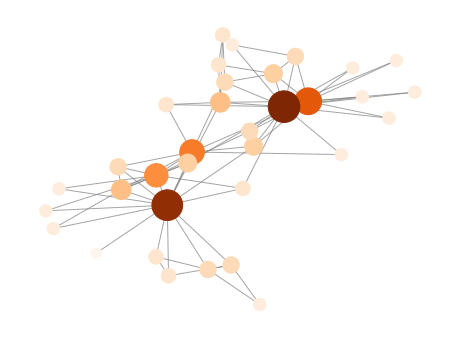

In [329]:
from matplotlib import cm

G_reactions_2 = nx.karate_club_graph()
pos = nx.spring_layout(G_reactions_2)

degree_centrality = nx.degree_centrality(G_reactions_2)

min_node_size = 100
max_node_size = 1000

dc_values = list(degree_centrality.values())
min_dc = min(dc_values)
max_dc = max(dc_values)
node_sizes = [min_node_size + (max_node_size - min_node_size) * (dc - min_dc) / (max_dc - min_dc) for dc in dc_values]

plt.figure(figsize=(8, 6))
# Créer une liste de couleurs pour les nœuds
node_colors = [degree_centrality[n] for n in G_reactions_2.nodes()]

# Créer une carte de couleurs à partir d'un gradient de couleurs rouges
cmap = cm.get_cmap('Oranges')

# Dessiner le réseau avec des nœuds colorés et de taille proportionnelle à leur degré
nx.draw_networkx_nodes(G_reactions_2, pos, node_size=node_sizes, node_color=node_colors, cmap=cmap)
nx.draw_networkx_edges(G_reactions_2, pos, width=1, alpha=0.7, arrowsize=0.5, edge_color='gray')

plt.axis('off')
plt.show()

# <h3> 2) Betweenness centrality</h3>

In [330]:
# Calculer la betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_reactions)

In [331]:
# Stocker les centralités dans un DataFrame
betweenness_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['user_id', 'betweenness_centrality'])
betweenness_df = betweenness_df.sort_values('betweenness_centrality', ascending=False).reset_index(drop=True)
# Imprimer les 10 premiers nœuds ayant la centralité la plus élevée
print(betweenness_df.head(8))

           user_id  betweenness_centrality
0  100008703273829                0.001303
1  100082864043624                0.001169
2  100011577424352                0.000807
3  100031085042335                0.000141
4  100062909560805                0.000061
5  100069016158093                0.000039
6  100071969110644                0.000006
7  100069973128911                0.000003


# <h5>Betweenness Centrality Visualization</h5>

In [332]:
G_reactions_3 = nx.karate_club_graph()
pos = nx.spring_layout(G_reactions_3)

betweenness_centrality = nx.betweenness_centrality(G_reactions_3)

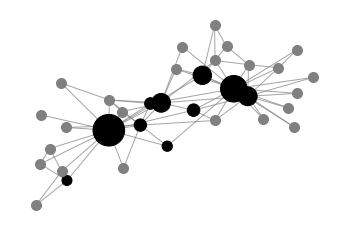

In [333]:
import operator
sorted_bc = sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)
top_10_bc = dict(sorted_bc[:10])
other_bc = dict(sorted_bc[10:])

pos = nx.spring_layout(G_reactions_3)

min_node_size = 100
max_node_size = 1000

bc_values = list(top_10_bc.values())
min_bc = min(bc_values)
max_bc = max(bc_values)
node_sizes = [min_node_size + (max_node_size - min_node_size) * (bc - min_bc) / (max_bc - min_bc) for bc in bc_values]

nx.draw_networkx_nodes(G_reactions_3, pos, nodelist=top_10_bc.keys(), node_size=node_sizes, node_color='k')
nx.draw_networkx_nodes(G_reactions_3, pos, nodelist=other_bc.keys(), node_size=100, node_color='gray')
nx.draw_networkx_edges(G_reactions_3, pos, width=1, alpha=0.7, arrowsize=0.5, edge_color='gray')
plt.axis('off')
plt.show()

# <h3> 3) Closeness centrality</h3>

In [334]:
# Calculer la centralité de proximité
closeness_centrality = nx.closeness_centrality(G_reactions)

In [335]:
# Stocker les centralités dans un DataFrame
closeness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['user_id', 'closeness_centrality'])
closeness_df = closeness_df.sort_values('closeness_centrality', ascending=False).reset_index(drop=True)
# Imprimer les 10 premiers nœuds ayant la centralité la plus élevée
print(closeness_df.head(10))

           user_id  closeness_centrality
0  100002028835739              0.323740
1  100003001016830              0.261635
2  100082864043624              0.140676
3  100008703273829              0.109797
4  100012555510355              0.103352
5  100001847544176              0.101183
6  100072155637215              0.091066
7  100006203372529              0.079392
8  100006424010192              0.078751
9  100001274195579              0.076014


# <h5>Closeness Centrality Visualization</h5>

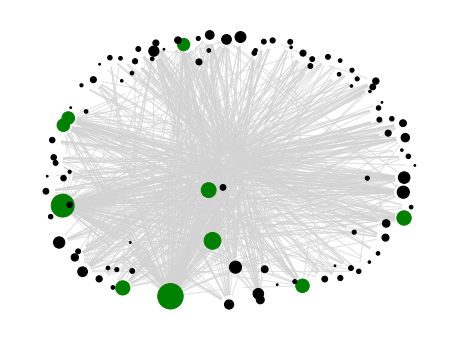

In [336]:
plt.figure(figsize=(8, 6))

# Trier les nœuds par ordre décroissant de closeness centrality et récupérer les 10 premiers
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_nodes = [x[0] for x in top_closeness]

# Définir la taille des nœuds en fonction de leur closeness centrality
node_sizes = [closeness_centrality[n] * 2000 for n in G_reactions.nodes()]

# Définir la couleur des nœuds, en noir pour les 10 premiers et en gris pour les autres
node_colors = ['g' if n in top_nodes else 'k' for n in G_reactions.nodes()]

# Dessiner le réseau avec les nœuds de couleur et de taille définies
pos = nx.spring_layout(G_reactions)
nx.draw_networkx_nodes(G_reactions, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G_reactions, pos, width=1, alpha=0.7, arrowsize=0.5, edge_color='lightgray')
plt.axis('off')
plt.show()